## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling
3. Using SMOTE

In [2]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [4]:
## Create dataframe with imbalance dataset
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [7]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [8]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### Up Sampling

In [9]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [10]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [11]:
df_minority_upsampled.shape

(900, 3)

In [12]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [13]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [14]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### Down Sampling

In [15]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [16]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [18]:
from sklearn.utils import resample
df_majority_upsampled=resample(df_minority,replace=False, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [20]:
df_majority_upsampled.shape

(100, 3)

In [21]:
df_downsampled=pd.concat([df_minority,df_majority_upsampled])

In [23]:
df_downsampled['target'].value_counts()

target
1    200
Name: count, dtype: int64

## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [3]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

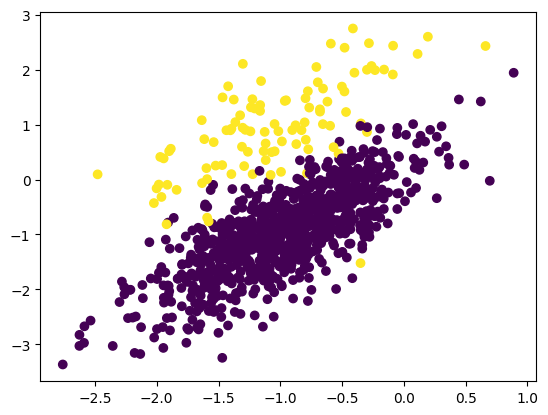

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [9]:
X.shape

(1800, 2)

In [10]:
y.shape

(1800,)

In [11]:
len(y[y==0])

900

In [12]:
len(y[y==1])

900

In [13]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

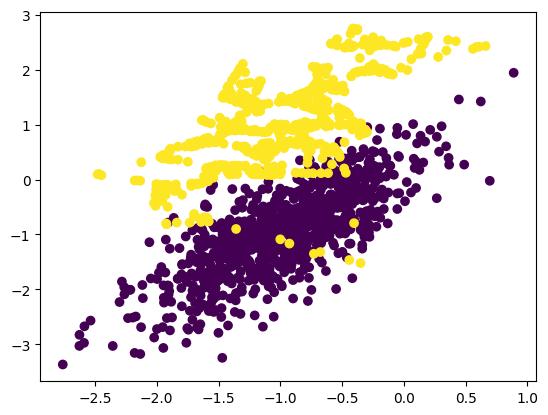

In [14]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])